In [10]:
##System Path
import os, sys
root = os.getcwd()
path =root+"/../../"
img_dir = root+"/img"
sys.path.append(path)

if(not os.path.exists(img_dir)):
    os.mkdir(img_dir)
img_dir

'C:\\Users\\benja\\OneDrive - ETH Zürich\\PhD\\Code\\ensembler_public\\examples\\dev/img'

# Basic Examples
## Potential

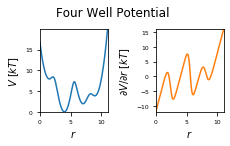

In [2]:
#imports
import numpy as np
from ensembler.potentials.OneD import fourWellPotential
from ensembler.visualisation.plotPotentials import plot_1DPotential

#build potential
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

#visualize
positions = np.linspace(start=0, stop=11, num=1000) #phase space to be visualized
fig, outpath = plot_1DPotential(potential=V, positions=positions, title="Four Well Potential")

In [3]:
fig, outpath = plot_1DPotential(potential=V, positions=positions, title="Four Well Potential", out_path=img_dir+"/four_well.png")


initializing Langevin old Positions	 





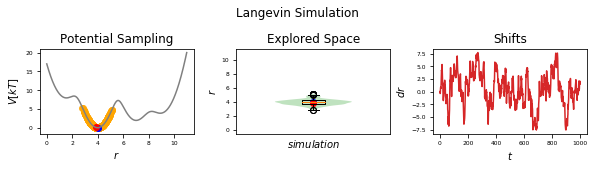

In [11]:
#Langevin integration simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import static_sim_plots

##Simulation Setup
V = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)

sampler = langevinIntegrator(dt=0.1, gamma=10)

sys = system(potential=V, sampler=sampler,  position=4,  temperature=1)

##Simulate
cur_state = sys.simulate(steps=1000)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = static_sim_plots(sys=sys, title="Langevin Simulation", x_range=positions)


In [12]:
fig, out_pSath = static_sim_plots(sys, title="Langevin Simulation", x_range=positions, out_path=img_dir+"/langevin_simulation.png")


initializing Langevin old Positions	 





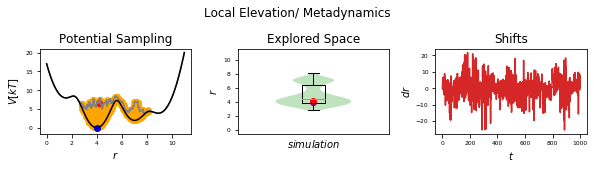

In [6]:
#Local elevation/metadynamics simulation:
##Imports
from ensembler.potentials.OneD import fourWellPotential, metadynamicsPotential
from ensembler.samplers.stochastic import langevinIntegrator
from ensembler.system import system
from ensembler.visualisation.plotSimulations import static_sim_plots

##Simulation Setup
origpot = fourWellPotential(Vmax=4, a=1.5, b=4.0, c=7.0, d=9.0,  ah=2., bh=0., ch=0.5, dh=1.)
V = metadynamicsPotential(origpot, amplitude=0.5, sigma=0.2, n_trigger=5)

sampler = langevinIntegrator(dt=0.1, gamma=10)

sys=system(potential=V, sampler=sampler,  position=4,  temperature=1)

##Simulate
cur_state = sys.simulate(steps=1000)

##Visualize
positions = np.linspace(start=0, stop=10, num=1000) #phase space to be visualized
fig, out_path = static_sim_plots(sys=sys, title="Local Elevation/Metadynamics Simulation", x_range=positions)


In [7]:
##visualize
fig, out_path = static_sim_plots(sys, title="Local Elevation/ Metadynamics", x_range=positions, out_path=img_dir+"/metaDynamics_simulation.png")
